# AI for Biotechnology
<span style="color:#AAA;font-size:14px;" >Prof. Dr. Dominik Grimm</span>  
<span style="color:#AAA;font-size:14px;">Bioinformatics Research Lab</span>  
<span style="color:#AAA;font-size:14px;">TUM Campus Straubing for Biotechnology and Sustainability</span>  

## K-Means Clustering
Let's first create some toy data:

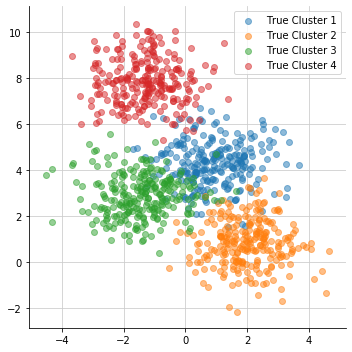

In [1]:
%matplotlib inline
import pylab as pl
import numpy as np
from sklearn.datasets import make_blobs

#generate figure
colors = ["tab:red","tab:blue","tab:green","tab:orange"]

X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0,cluster_std=1)

#generate figure
fig = pl.figure(figsize=(5,5))
ax = fig.add_subplot(111)

ax.scatter(X[y==0,0],X[y==0,1],alpha=0.5,label="True Cluster 1",zorder=30,c=colors[1])
ax.scatter(X[y==1,0],X[y==1,1],alpha=0.5,label="True Cluster 2",zorder=30,c=colors[3])
ax.scatter(X[y==2,0],X[y==2,1],alpha=0.5,label="True Cluster 3",zorder=30,c=colors[2])
ax.scatter(X[y==3,0],X[y==3,1],alpha=0.5,label="True Cluster 4",zorder=30,c=colors[0])

#ax.scatter(X[:,0],X[:,1],alpha=0.5,zorder=30)

ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
pl.legend()
pl.tight_layout()

Perform k-Means Clustering using k=4:

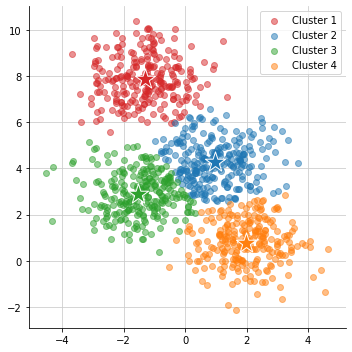

In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(X)
cluster = kmeans.labels_

fig = pl.figure(figsize=(5,5))
ax = fig.add_subplot(111)

ax.scatter(X[cluster==0,0],X[cluster==0,1],alpha=0.5,label="Cluster 1",zorder=30,c=colors[0])
ax.scatter(X[cluster==1,0],X[cluster==1,1],alpha=0.5,label="Cluster 2",zorder=30,c=colors[1])
ax.scatter(X[cluster==2,0],X[cluster==2,1],alpha=0.5,label="Cluster 3",zorder=30,c=colors[2])
ax.scatter(X[cluster==3,0],X[cluster==3,1],alpha=0.5,label="Cluster 4",zorder=30,c=colors[3])

#plot cluster centers

for i,cl in enumerate(kmeans.cluster_centers_):
    ax.scatter(cl[0],cl[1],marker="*",zorder=35,color=colors[i],s=450,edgecolor="#FFFFFF")

ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
pl.legend()
pl.tight_layout()


### k-Means Clustering for Image Segmentation

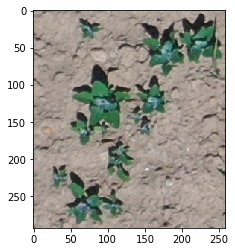

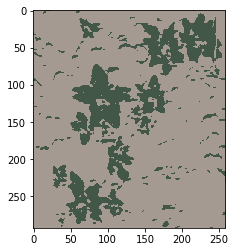

In [15]:
from matplotlib.pyplot import imread

img = imread("plant.png")

kmeans = KMeans(n_clusters=2)
kmeans.fit(img.reshape(img.shape[0]*img.shape[1],img.shape[2]))

pl.figure()
pl.imshow(img)
pl.figure()
pl.imshow(np.array(kmeans.cluster_centers_[kmeans.labels_].reshape(img.shape),dtype="float"))

## Kernel k-Means Clustering
Let's first create some toy data that cannot be clustered using standard k-means:

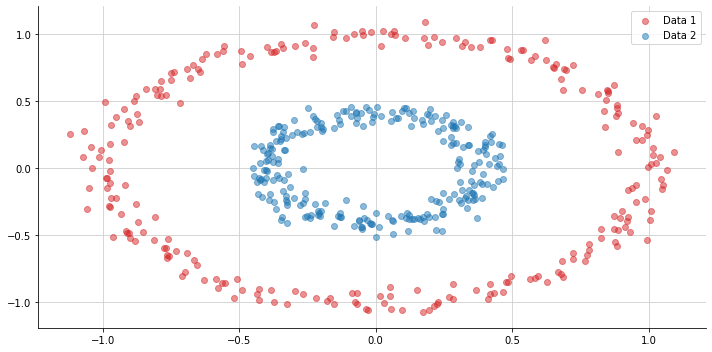

In [4]:
from sklearn.datasets import make_circles

X,y = make_circles(n_samples=500, random_state=0,noise=0.05,factor=0.4)

#generate figure
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)

ax.scatter(X[y==0,0],X[y==0,1],alpha=0.5,label="Data 1",zorder=30,c=colors[0])
ax.scatter(X[y==1,0],X[y==1,1],alpha=0.5,label="Data 2",zorder=30,c=colors[1])


ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
pl.legend()
pl.tight_layout()

Perform standard k-means:

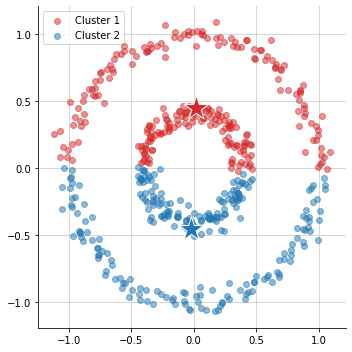

In [5]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
cluster = kmeans.labels_

#generate figure
colors = ["tab:red","tab:blue","tab:green","tab:orange"]

fig = pl.figure(figsize=(5,5))
ax = fig.add_subplot(111)

ax.scatter(X[cluster==0,0],X[cluster==0,1],alpha=0.5,label="Cluster 1",zorder=30,c=colors[0])
ax.scatter(X[cluster==1,0],X[cluster==1,1],alpha=0.5,label="Cluster 2",zorder=30,c=colors[1])

#plot cluster centers

for i,cl in enumerate(kmeans.cluster_centers_):
    ax.scatter(cl[0],cl[1],marker="*",zorder=35,color=colors[i],edgecolor="#FFFFFF",s=650)

ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
pl.legend()
pl.tight_layout()


Perform spectral clustering with an RBF Kernel (a variant of kernel k-means, since kernel k-means is not implemented in sklearn):

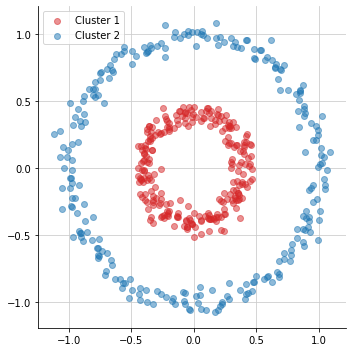

In [6]:
from sklearn.cluster import SpectralClustering

kmeans = SpectralClustering(n_clusters=2,random_state=0,affinity="rbf",gamma=100)
kmeans.fit(X)
cluster = kmeans.labels_

#generate figure
colors = ["tab:red","tab:blue","tab:green","tab:orange"]

fig = pl.figure(figsize=(5,5))
ax = fig.add_subplot(111)

ax.scatter(X[cluster==0,0],X[cluster==0,1],alpha=0.5,label="Cluster 1",zorder=30,c=colors[0])
ax.scatter(X[cluster==1,0],X[cluster==1,1],alpha=0.5,label="Cluster 2",zorder=30,c=colors[1])

#plot cluster centers

#for i,cl in enumerate(kmeans.cluster_centers_):
#    ax.scatter(cl[0],cl[1],marker="*",zorder=35,color=colors[i],s=90)

ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
pl.legend()
pl.tight_layout()


# Principle Component Analysis
Let's first create some toy data:

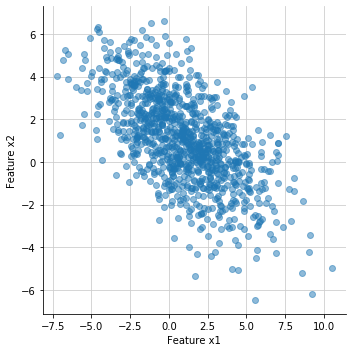

In [7]:
#Example from sklearn: https://matplotlib.org/devdocs/gallery/statistics/confidence_ellipse.html
def get_correlated_dataset(n, dependency, mu, scale):
    latent = np.random.randn(n, 2)
    dependent = latent.dot(dependency)
    scaled = dependent * scale
    scaled_with_offset = scaled + mu
    # return x and y of the new, correlated dataset
    return scaled_with_offset[:, 0], scaled_with_offset[:, 1]

dependency = [[0.9, -0.4],
              [0.1, -0.6]]

x, y = get_correlated_dataset(1000,dependency,1,3)
X = np.column_stack([x,y])

#generate figure
fig = pl.figure(figsize=(5,5))
ax = fig.add_subplot(111)

ax.scatter(X[:,0],X[:,1],alpha=0.5,label="Data 1",zorder=30)

ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Feature x1")
ax.set_ylabel("Feature x2")
pl.tight_layout()

Implement PCA using standard numpy code:

In [8]:
from sklearn.preprocessing import StandardScaler
import numpy.linalg as linalg

#normalize data: zero mean, unit variance
scaler = StandardScaler()
Xn = scaler.fit_transform(X)

#compute covariance matrix:
C = 1/(Xn.shape[0]-1) * (Xn.T).dot(Xn)

#compute eigenvectors and eigenvalues using eigensolver
(d,V) = linalg.eig(C)

#compute transformed data
Xt = np.dot(Xn,V.T)

Plot Principle components in original data plot:

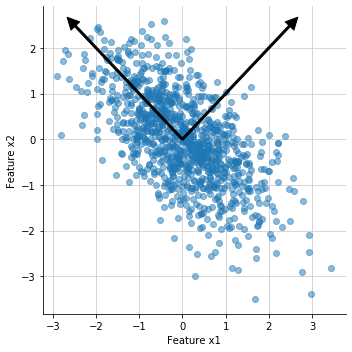

In [9]:
fig = pl.figure(figsize=(5,5))
ax = fig.add_subplot(111)

ax.scatter(Xn[:,0],Xn[:,1],alpha=0.5,label="Data 1",zorder=30)

mu = Xn.mean(axis=0)
sigma = Xt.std(axis=0).mean()*4
for pc in V:
    start, end = mu, mu + sigma * pc
    ax.annotate(
        '', xy=end, xycoords='data',
        xytext=start, textcoords='data',
        arrowprops=dict(facecolor='k', width=2.0),zorder=100)
    
ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Feature x1")
ax.set_ylabel("Feature x2")
#ax.set_aspect('equal')
pl.tight_layout()


Transform data into new coordinate system and plotting the transformed data:

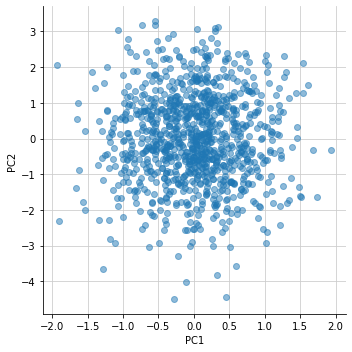

In [10]:
#generate figure
fig = pl.figure(figsize=(5,5))
ax = fig.add_subplot(111)

ax.scatter(Xt[:,0],Xt[:,1],alpha=0.5,label="Data 1",zorder=30)

ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
#pl.legend()
pl.tight_layout()

## Toy example: PCA for image compression

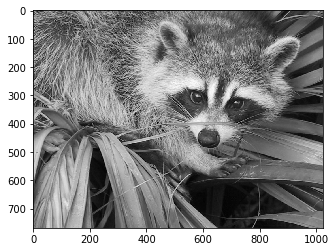

In [11]:
import scipy.misc as misc   
    
img = misc.face()

R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]
img_gray = R * 299. / 1000 + G * 587. / 1000 + B * 114. / 1000
img_gray = np.array(img_gray,dtype="int")

pl.figure()
pl.imshow(img_gray,cmap='gray', vmin=0, vmax=255)

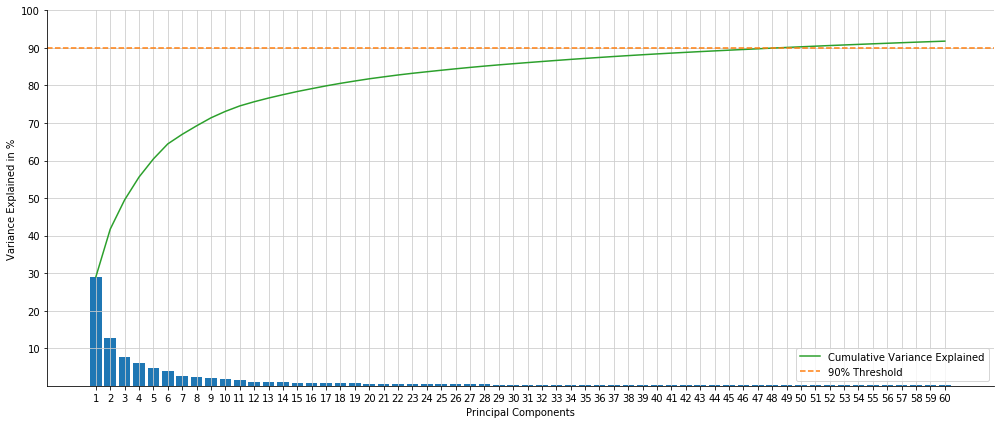

In [13]:
from sklearn.decomposition import PCA

#perform PCA using SKLEARN
pca = PCA()
pca.fit(img_gray)

pl.figure(figsize=(14,6))
#plot variance explained for the first 60 features
n=60

ax = pl.subplot(111)
ax.bar(np.arange(1,1+len(pca.explained_variance_[0:n])),pca.explained_variance_ratio_[0:n]*100)
ax.plot(np.arange(1,1+len(pca.explained_variance_[0:n])), np.cumsum(pca.explained_variance_ratio_[0:n])*100,color="tab:green", label="Cumulative Variance Explained")
ax.set_xticks(np.arange(1,1+len(pca.explained_variance_[0:n])))
ax.set_yticks([10,20,30,40,50,60,70,80,90,100])
pl.axhline(90,color="tab:orange",linestyle="dashed",label="90% Threshold")

ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Principal Components")
ax.set_ylabel("Variance Explained in %")
pl.legend()
pl.tight_layout()

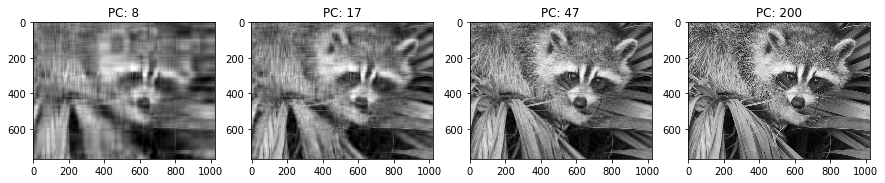

In [14]:
#compute PCA for different number of components and reconstruct original image

components = [8,17,47,200]

fig = pl.figure(figsize=(15,5))
for i,c in enumerate(components):
    pca = PCA(n_components=c)
    pca.fit(img_gray)
    #transform data to new space
    itn = pca.transform(img_gray)
    #reconstruct image using only the reduced set of components
    rec = pca.inverse_transform(itn)

    
    ax= fig.add_subplot(1,4,i+1)
    ax.imshow(rec,cmap='gray', vmin=0, vmax=255)
    pl.title("PC: %d" % c)